In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**DATA LOADING**
* pandas is a python library that is used for data manipulation ,, so first line of code imports this library into our working environment, ready for use
* second lines defines the file path were the data we are going to use is located.
line 3 loads up the data to be used into our working environment, we use the pandas library (which we defined as pd) to load up the data,, we use a function within pandas that is called "read_csv()" , and inside the functions parathenses we pass the file path to the dataset as the parameter
* csv standing for "comma separated values" is just a format of storing data,, and its data is in tabular formats , its files you can even open them using microsoft excel to display its tables
* After the csv file is read ,, it is stored in a variable named Dataframe, so the last line of code writen as "DataFrame.head(5)" is taking the stored dataframe then displaying the first 5 rows of the dataframe , as seen on the display only five rows are shown ,, alternatively you could all rows by simply writting the code "DataFrame"

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
DataFrame=pd.read_csv('/content/drive/MyDrive/Dataset/Salary_dataset.csv')
DataFrame.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Splitting Data into Train and test
* It is a good practice in machine learning to divide the data into training and test data ,, so that after the training is complete then the machine learning model should be tested or evaluated using completely new data that was never used in training
* This practice eliminates a common problem called **Overfitting** which happens when the model has simply memorized the training data instead of learning from it, which makes it appear as if the model has been trained well but eventually performs poorly on new data
* We use a function called train_test_split(imported from sklearn.model_selection) to perform this action, and it takes in the x value and why values as the compulsory inputs ,, but also you can add inputs like "test_size=0.2", which defines that 20% of the data is used as test while 80% for training,, while "shuffle" , it randomizes the selection of train and test data hence reducing bias
* When the 'train_test_split' is perfomed , it gives out four outputs namely (x-values of train data, x-value of test data, y-value of train data, y value of test) in that respective older , so you have to store these values into four variables names separated by commas
* It is also worthy noting that when diving the data , majority of it should be the train data .. by rule , it is good practice that the train data is atleast 70% of the original data

In [4]:
from sklearn.model_selection import train_test_split
x=DataFrame[["YearsExperience"]]
y=DataFrame["Salary"]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,shuffle=True)

# DATA VISUALIZATION
* first line of code import a python library called matplotlib that is used for data visualization tasks such plotting graphs, scatter plots and many more
* the line 2 is isolating the independent variable(x) from the dataframe that we loaded ,, so our x are all values that are in the column of "YearsExperience", so inorder to get that column we simply index the dataframe using square brackets and then put the string "YearsExperience" inside the blackets. We used double blackets because of reduced dimensionality to avoid errors when training
* line 3 loads the dependent variable(y) which is "Salary" using same techniques as before ,,  but this could used by using the code "DataFrame.Salary", the codes extracts the whole column of Salary from the dataframe
* line 4 "plt.scatter(x,y)" , uses the tool/library "matplotlib" in which we shorten its name to plt when importing for easy usabilility ,, sothe scatter function we are using creates a scatter plot and takes in two inputs which are the x-axis values and y-axis values
* **Now this time we are doing scatter plot of the training data**

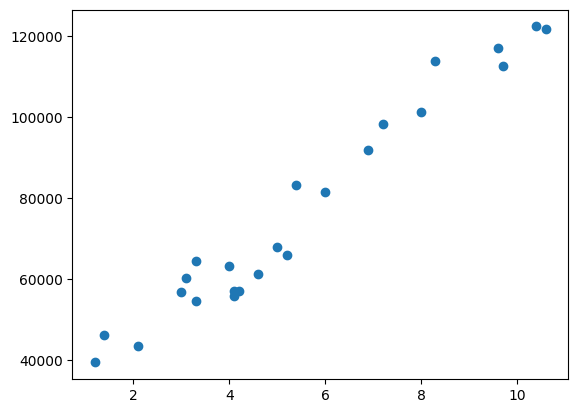

In [5]:
import matplotlib.pyplot as plt
# x=DataFrame[["YearsExperience"]]
# y=DataFrame["Salary"]
# plt.scatter(x,y)
plt.scatter(train_x,train_y)

# Model Training
* line 1 imports a LinearRegression from the sklearn ,, actually sklearn is a short form for "scikit learn"
* line 2, the LinearRegression model is being initialized by callig the function "LinearRegression" which we imported from sklearn, now the model is ready for training
* line 3, we are now training the model, and we use the function **"fit"** , which takens two inputs which are the x and y values
* **now this time ,, when training using the fit function, we will put the training data x and y values as inputs**

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

# Model Evaluation
* After making the model, we can now use it to make a prediction of the output (y) , whenever input (x) is given ,, and for that task we use the predict function which takes in the input x as its argument
* The predicted values by the model will be stored in a variable called "predicted_values", and we can visualize the line of best fit that the linear regression is using to make predictions by using matplotlib and using the plot function within it, which is our case it will take the x values and the presictes y values as inputs


In [7]:
# predicted_values= model.predict(x)
# plt.scatter(x,y)
# plt.plot(x,predicted_values,color="red")

# Evaluation
* This time we will do proper evaluation of the model, using what we call evaluation metrics
* metrics are just numbers that defines how good the model is perfoming , for regressions tasks we use metrics like r2 score, mean square error e.t.c,, i will use r2 score for demonstration
* r2 score also called coefficient of determination is a statistical used to evaluate how well the linear regression model is ,, this 1 meaning a perfectly model and 0 meaning a worse model ,,,
* This metric uses the actual value of y and the predicted value to calculate the r2 , thats why the function (r2_score()) in line 3 of the code is taking these two values as inputs
* our model is showing a r2_score , close to 1 , which shows that our model is performing better

In [8]:
from sklearn.metrics import r2_score
y_predicted = model.predict(test_x)
r2=r2_score(test_y, y_predicted)
print(r2)

0.9564169452850156


# Predicted Vs actual values
* for this we will personally create the table using the pandas library
* in pandas we use the "Dataframe()" function to create our own dataframe , and this function takes in a python diction as input , and we defined the dictionary in line 2 of code
* the keys (e.g "Actual_values") of the dictionary represent the titles that are to be put on the columns
* the values in dictionary represent the values that will be present in the respective colums ,, they are put in list form but since we already have the lists containing the predicted values and actual values we will simply put its variables there

In [9]:
data = {
    'Actual_values': test_y,
    'Predicted_values': y_predicted,
}

df = pd.DataFrame(data)
df

,Actual_values,Predicted_values
24,109432.0,107682.420380
9,57190.0,61221.048385
2,37732.0,40778.044707
25,105583.0,110470.102700
19,93941.0,82593.279503
4,39892.0,47282.636787
